* Histogram
* Outliers
* Box Plot
* Summary Statistics
* CDF
* Effect size
* Relationship Between Variable
* Correlation
* Covariance
* Pearson Correlation
* Spearman's Rank Correlation
* Mean vs Median
* Hypothesis Testing
* Normal(Guassian) Distribution and z-score

In [2]:
import pandas as pd

data = pd.read_csv('data.csv')

data = data.drop(['Unnamed: 32', 'id'], axis=1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.head()
data.shape
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Histogram
* How many times each value appears in dataset. This description is called the distribution of variable.
* Most common way to represent distribution of variable is histogram that is graph which shows frequency of each value.
* Frequency = number of times each value appears.
* EX: [1, 1, 1, 1, 2, 2, 2]. 

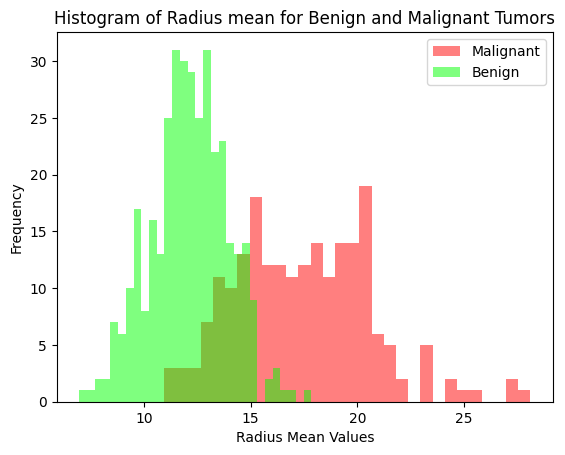

Most frequent malignant radius mean: 20.101999999999997


In [4]:
import matplotlib.pyplot as plt

m = plt.hist(data[data['diagnosis'] == 'M'].radius_mean, bins=30, fc = (1, 0, 0, 0.5), label='Malignant')
b = plt.hist(data[data['diagnosis'] == 'B'].radius_mean, bins=30, fc = (0, 1, 0, 0.5), label='Benign')

plt.legend()
plt.xlabel('Radius Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Radius mean for Benign and Malignant Tumors')
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print(f"Most frequent malignant radius mean: {most_frequent_malignant_radius_mean}")

* Lets look at other conclusions
* From this graph you can see that raduis mean of malignant tumors are bigger than raduis mean of benign tumors mostly.
* The benign distribution (green in graph) is approcimately bell-shape that is shape of normal distribution (guassian distribution)
* Also you can find reult like that most frequent malignant raduis mean is 

## Outliers

* While looking histogram as you can see there are rare values in benign distribution (green in graph)
* There values can be errors or rare events.
* There errors and rare events can be called outliers.
* Calcuulating outliers:
    * first we need to calculate first quartile (Q1)(25%)
    * then find IQR(Inter Quartile Range) = Q3 - Q1
    * finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
    * Anything outside this range is an outlier
    * lets write the code for benign tumor distribution for feature radius mean

In [5]:
data_benign = data[data['diagnosis'] == 'B']
data_malignant = data[data['diagnosis'] == 'M']
desc = data_benign.radius_mean.describe()

Q1 = desc['25%']
Q2 = desc['50%']
Q3 = desc['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Anything outside this range is an outlier: (", lower_bound, ",", upper_bound, ")")
data_benign[data_benign.radius_mean < lower_bound].radius_mean
print("Outliers: ", data_benign[(data_benign.radius_mean < lower_bound) | (data_benign.radius_mean > upper_bound)].radius_mean.values)
desc

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

## Box Plot
* You can see outliers also from box plots
* We found 3 outlier in benign radius mean and in box plot there are 3 outlier.

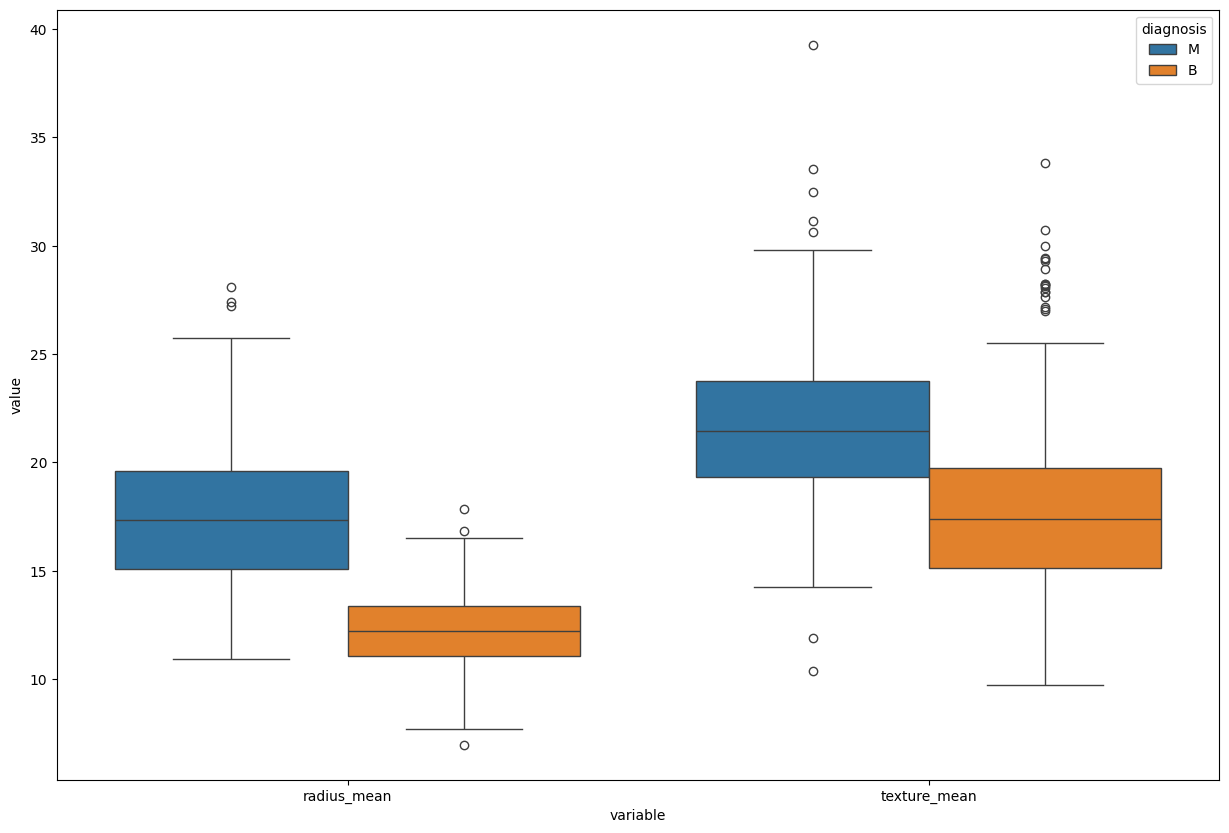

In [6]:
import seaborn as sns

melted_data = data.melt(
    id_vars=["diagnosis"],
    value_vars= ["radius_mean", "texture_mean"]
)
plt.figure(figsize=(15, 10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data = melted_data)
plt.show()

`Summary Statistics`
* Mean 
* Variance: spread of distribution
* Stadard deviation square root of variance
* Lets look at summary statistics of benign tumor radiance mean

In [7]:
print("Mean: ", data_benign.radius_mean.mean())
print("Variance: ", data_benign.radius_mean.var())
print("Standard Deviation: ", data_benign.radius_mean.std())
print("Describe method: ", data_benign.radius_mean.describe())

Mean:  12.146523809523808
Variance:  3.170221722043872
Standard Deviation:  1.7805116461410389
Describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


## CDF 
* Cumulative distribution function is the probability that the variable takes a value less than or equal to x. 
`P(X <= x)` 
* Lets explain in cdf graph of benign radius mean
* in graph, what is `P(12<X)`? The answer is 0.5. The probability that the variable takes a values less than or equal to 12(radius mean) is 0.5.
* You can plot cdd with two different method.

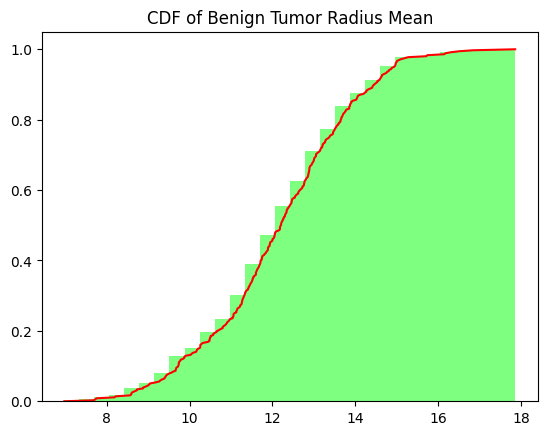

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting CDF of benign tumor radius mean
plt.hist(data_benign.radius_mean, bins=30, fc=(0, 1, 0, 0.5), label='Benign', density=True, cumulative=True)

# Sorting the data to plot the CDF
sorted_data = np.sort(data_benign.radius_mean)
y = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

# Plotting the CDF as a line
plt.plot(sorted_data, y, color='red')

# Adding title and showing the plot
plt.title('CDF of Benign Tumor Radius Mean')
plt.show()


* X-axis (Horizontal): This represents the values of radius_mean (the mean radius of the benign tumors). It spans from approximately 8 to 18.
* Y-axis (Vertical): This represents the cumulative probability, which ranges from 0 to 1. As you move from left to right along the X-axis, the cumulative probability increases, meaning the probability that the radius_mean is less than or equal to a given value.
* The red line: This line represents the cumulative probability curve. It starts from 0 on the left (indicating that no data points exist below the minimum radius) and increases as the radius_mean increases. The curve ends at 1, meaning that 100% of the data points fall below the maximum radius value of 18.

## Effect size
* One of the summary statistics.
* It describes size of an effect. It is simple way of quantifying the different between two groups.
* In an other saying, effect size emphasises the size of the difference
* Use cohen effect size
* Cohen suggest that if d(effect size) = 0.2, it is small effect size, d = 0.5 medium effect size, d = 0.8 large effect size.
* lets compare size of the effect between benign radius mean and malignant radius mean.
* Effect size is 2.2 that is too big and says that two groups are different from each other as we expect. Because our groups are benign radius mean and malignant radius mean that are different from each other.

In [9]:
mean_diff = data_malignant.radius_mean.mean() - data_benign.radius_mean.mean()
var_benign = data_benign.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = ((len(data_benign) - 1) * var_benign + (len(data_malignant) - 1) * var_malignant) / float(len(data_benign) + len(data_malignant) - 2)

effect_size = mean_diff / np.sqrt(var_pooled)
print("Effect size: ", effect_size)

Effect size:  2.205463451570754


## Relationship Between Variable
* We can say that two variables are related with each other, if one of them gives information about others
* for example, price and distance. if you yo long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
* Scatter Plot
* Simplest way to check relationship between two variables
* Lets look at relationship between radius mean and area mean
* In scatter plot you can see that when radius mean increase, area mean also increases. Therefore, they are positively correlated with each other.
* There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean.

<Figure size 1500x1000 with 0 Axes>

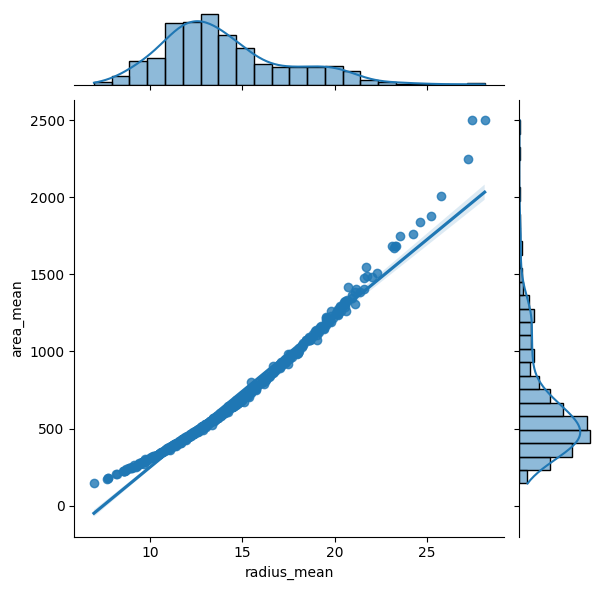

In [10]:
plt.figure(figsize=(15, 10))
sns.jointplot(x="radius_mean", y="area_mean", data=data, kind="reg")
plt.show()

c:\AI\anacoda\envs\myenv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\AI\anacoda\envs\myenv\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
c:\AI\anacoda\envs\myenv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\AI\anacoda\envs\myenv\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
c:\AI\anacoda\envs\myenv\Lib\site-packages\seaborn\utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
c:\AI\anaco

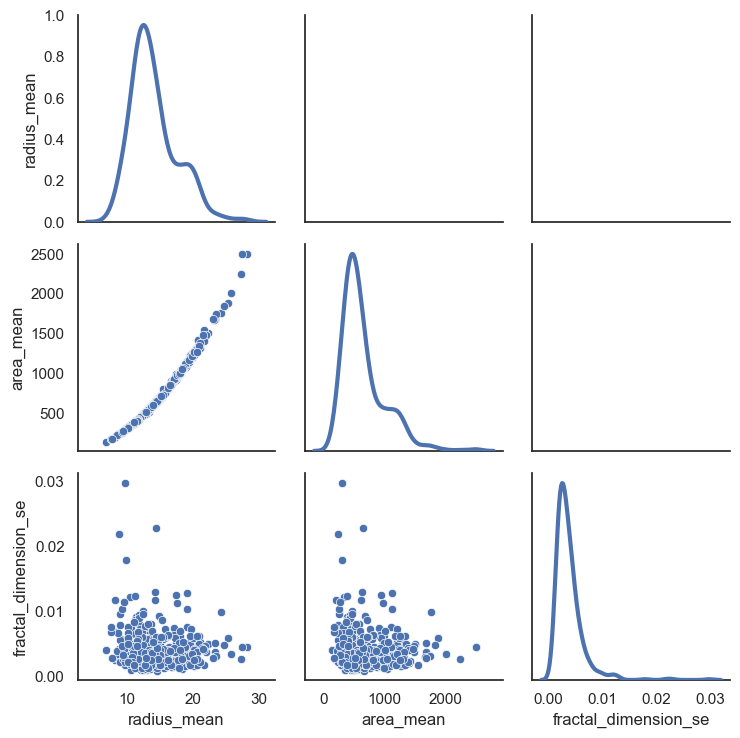

In [11]:
# Also we can look relationship between more than two variables
sns.set(style="white")

df = data.loc[:, ["radius_mean", "area_mean", "fractal_dimension_se"]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.scatterplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw = 3)
plt.show()

## Correlation
* Strength of the relationship between two variables
* Lets look at correlation between all features.

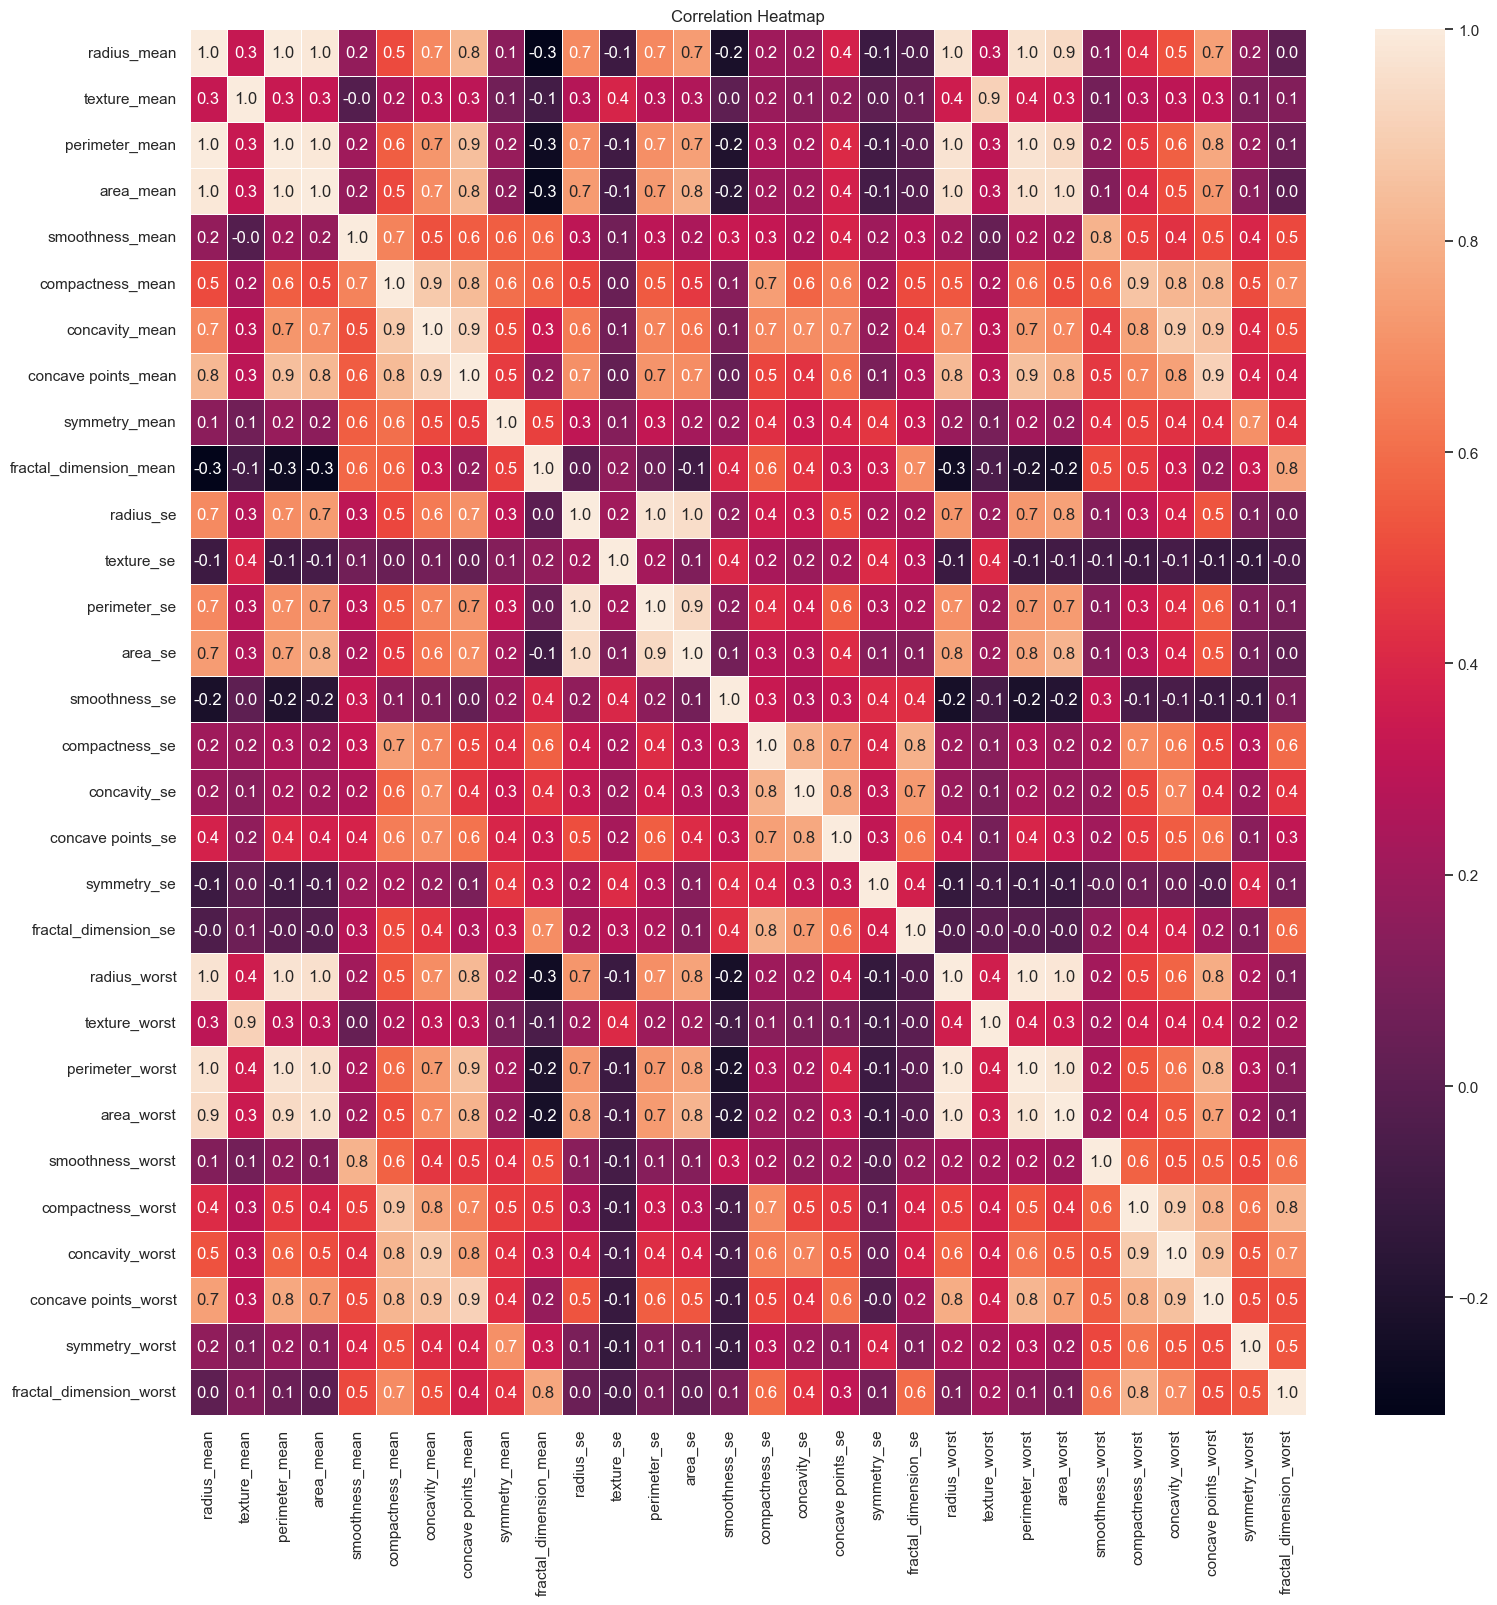

In [12]:
# Select only numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap')
plt.show()

* Huge matrix that includes a lot of numbers
* The range of this numbers are -1 to 1
* Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean
* Meaning of zero is there is no correlation between variables like radius mean and fractal dimension se
* Meaning of -1 is two variable are negatively correlated with each other like radius mean and fractal dimension mean. Actually correlation between of them is not -1, it is -0.3 but the idea that if sign of correlation is negative that means that there is negative correlation.

## Covariance
* Covariance is measure of the tendency of two variables to vary together
* So covariance is maximized if two vectors are identical
* Covariance is zero if they are orthogonal.
* Covariance is negative if they point in opposite direction
* Lets look at covariance between radius mean and area mean. Then look at radius mean and fractal dimension se

In [13]:
# np.cov(data.radius_mean, data.area_mean)
print("Covariance between radius mean and area mean: ", data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ", data.radius_mean.corr(data.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.04264126911445617


## Pearson Correlation
* Division of covariance by std of variable
* lets look at pearson correlation between radius mean and area mean
* First lets use `.corr()` method that we used actually at correlation part. In correlation part we actually used pearson correlation
* p1 and p2 is the same. In p1 we use corr() method, in p2 we apply def. of pearson correlation `(cov(A,B)/std(A)*std(B))` 
* As we expect pearson correlation between area_mean and area_mean is 1 that means that they are same distribution
* Also pearson correlation between area_mean and radius_mean is 0.98 that they are positively correlated with each other and relationship between of them is very high.
* To be more clear what we did at correlation part and pearson correlation part is same.

In [14]:
p1 = data.loc[:, ["area_mean", "radius_mean"]].corr(method="pearson")
p2 = data.radius_mean.cov(data.area_mean) / (data.radius_mean.std() * data.area_mean.std())

print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ', p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566132


## Spearman's Rank Correlation
* Pearson correction works well if the relationship between variables are linear and variables are rougly normal. but it is not robust, if there are outliers
* To compute spearman's correlation we need to compute rank of each value

In [15]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:, ["area_mean", "radius_mean"]].corr(method="pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


* Spearman's correlation is little higher than pearson correlation
    * if relationship between distributions are non-linear, spearman's correlation tends to better estimate the strength of relationship
    * Pearson correlation can be affected by outliers. Spearman's correlation is more robust.

## Mean Vs Median
* Sometimes instead of mean we need to use median. I am going to explain why we need to use median with an example
* Lets think that there are 10 people who work in a company. Boss of the company will make raise in their salary if their mean of salary is smaller than 5

In [16]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


* Mean of salary is 52.5 so the boss thinks that 10000 I gave a lot of salary to my employees. And do not makes raise in their salaries. However as you know this not fair and 500 (salary) is outlier for this salary list.
* Median avoids outliers

In [17]:
print("Median of salary: ", np.median(salary))

Median of salary:  3.0


* Now median of the salary is 3 and it is less than 5 and employees will take raise in their sallaries and they are happy and this situation is fair

## Hypothesis Testing
* Classical Hypothesis Testing is a statistical method that helps you decide whether there is enough evidence in sample of data to support or reject a hypothesis about a population.
* Steps in Hypothesis Testing:

    * step 1: State the hypotheses
        * Null Hypothesis: There is no relationship between the two variable (H0: corr = 0)
        * Alternative Hypothesis: There is a relationship between the two variable (Ha: corr != 0)
    * step 2: Choose the test statistic (e.g. Pearson corr coefficient)
    * step 3: Compute the p-value using the appropriate statistical test.
    * step 4: Make a decision:
        * if `p-value <= alpha (usually 0.05)`, reject `H0`: There is a significant relationship between the variables.
        * if `p-value > 0.05`, fail to reject `H0`: There is no significant relationship.
* Interpretation:
    * Rejecting `H0` means the effect (relationship between `radius_mean` and `area_mean`) is statistically significant.
    * A low `p-value` suggests that it is unlikely the observed relationship is due to chance.
    * if `p-value > 0.05`, evidence is not strong enough to reject the null hypothesis.
* Example:
    * Null Hypothesis: "There is no relationship between `radius_mean` and `area_mean` in the tumor population."
    * Alternative Hypothesis: "There is a relationship between `radius_mean` and `area_mean`."
    * Calculate `p-value` using Pearson corr. If `p-value <= 0.05`, reject the null hypothesis and conclude that the two variables are related.

In [18]:
from scipy import stats
statistic, p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print('p-value: ',p_value)

p-value:  1.5253492492559045e-184


* P-value is almost zero so we can reject null hypothesis.

## Normal (Gaussian) Distribution and z-score
* Also called bell shape distribution 
* Instead of making formal def. of gaussian distribution
* Example is gaussian is IQ score:
    * In the world lets say average IQ is 110.
    * There are few people that are super intelligent and their IQs are higher than 110. It can be 140 or 150 but it is rare.
    * Also there are few people that have low intelligent and their IQ is lower that 110. It can be 40 or 50 but it is rare.
    * From these info. we can say that mean of IQ is 110. And lets say standard deviation is 20.
    * Mean and Standard deviation is parameters of normal distribution.
    * Lets create 10000 sample and visualize it with histogram.

mean:  109.99544883832631
standard deviation:  19.975153314717677


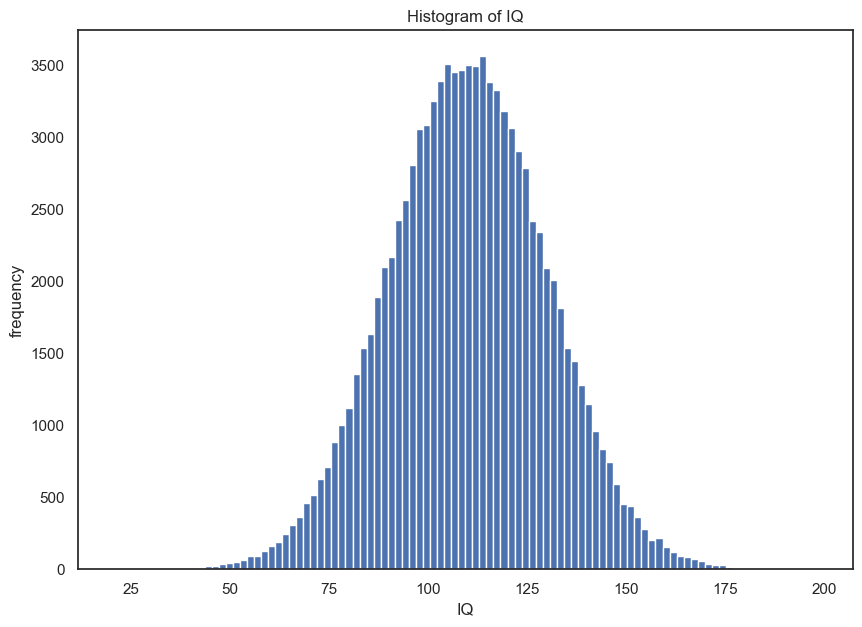

In [20]:
mu, sigma = 110, 20
s = np.random.normal(mu, sigma, 100000)
print('mean: ', np.mean(s))
print('standard deviation: ', np.std(s))

# visualize with histogram
plt.figure(figsize=(10, 7))
plt.hist(s, 100, density=False)
plt.ylabel('frequency')
plt.xlabel('IQ')
plt.title("Histogram of IQ")
plt.show()

* As it can be seen from histogram most of the people are cumulated near to 110 that is mean of our normal distribution.
* However what is the "most" I mentioned at previous sentence? What if I want to know what percentage of people should have an IQ score between 80 and 140?
* We will use z-score the answer this question.

* z = (x - mean)/std
* z1 = (80 - 110)/20 = -1.5
* z2 = (140 - 110) = 1.5
* Distance between mean and 80 is 1.5 std and distance between mean and 140 is 1.5std.
* If you look at z table, you will see that 1.5std correspond to 0.4332.

* Lets calculate it with 2 because 1 from 80 to mean and other from mean to 140
* 0.4332 * 2 = 0.8664
* 86.64 % of people has an IQ between 80 and 140.

* What % of people should have an IQ score less than 80?
* z = (110 - 80)/20 = 1.5
* Lets look at table of z-score 0.4332. 43.32% of people has an IQ between 80 and mean(110).
* If we substract from 50% to 43.32%, we can find people have an IQ score less than 80.
* 50 - 43.32 = 6.68. As a result, 6.68% of people have an IQ score less than 80.